<a href="https://colab.research.google.com/github/amandadb/MVP_Engenharia_de_dados/blob/main/MVP_World_Hapiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas: World Hapiness Report

**Nome:** Amanda Dias Bobba

**Matrícula:** 4052024002010

**Dataset:**
- [World Hapiness Report 2021, 2022 e 2023](https://www.kaggle.com/datasets/joebeachcapital/world-happiness-report-2013-2023?select=World+Happiness+Report+2023.csv)
- [World Hapiness Report 2024](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024?select=WHR2024.csv)


# Descrição do problema: Análise de Correlação - Indicadores vs Ladder Score

Entender como evoluiu o nível de felicidade global (ladder score) ao longo do tempo, e quais fatores, especialmente o desenvolvimento econômico dos países e a distribuição geográfica da riqueza, explicam as diferenças observadas entre nações e continentes

# Hipóteses do problema

- **Hipótese 1**: O ladder score tem melhorado ao longo dos anos.
- **Hipótese 2**: Continentes com mais paises desenvolvidos tem o ladder score mais alto atualmente.
- **Hipótese 3**: Quais indicadores impactam mais o Ladder Score?

# Tipo de problema
Este projeto prepara os dados para uma classificação supervisionada. Dado um histórico de 2021, 2022 e 2023 do world hapiness report, pode-se prever o resultado do ladder score de 2024. Como já tem o relatório de 2024, é possível avaliar se o modelo irá acertar.

#Seleção de dados
Para esta análise, foram selecionadas as colunas presentes em todas as bases de dados do World Happiness Report que se relacionam diretamente com o 'Ladder score', o índice de felicidade.

Existem duas representações para os fatores que compõem o 'Ladder score': uma com o prefixo 'Explained by' no título da coluna e outra sem ele. Nesse trabalho será utilizado as colunas 'Explained by'. Essas colunas quantificam, de forma direta, a contribuição individual de cada fator para a nota final de felicidade de um país, o 'Ladder score'. Assim, o 'Ladder score' é calculado pela soma de todas as colunas 'Explained by' e a coluna 'Dystopia + residual'.

É importante mencionar que as colunas sem o prefixo 'Explained by' representam os valores brutos ou medidos de cada fator (como o PIB per capita real de um país). Esses valores passam por um tratamento estatístico complexo para determinar o quanto cada fator contribui para o 'Ladder score', resultando nas colunas 'Explained by'.

# Atributos do dataset
Nesse dataset está presente os últimos 4 anos do world hapiness report, com um total de 575 lihas e em torno de 145 países participantes por ano. Para analisar o "ladder score" indicador de felicidade dos países, foi escolhido os atributos:

1. Ano: Ano de medição;
2. Country name: Nome do país;
3. Regional Indicator: Região geográfica à qual o país pertence;
4. Continent: Continente do país;
5. Economic Development: Se o país é desenvolvido ou em desenvolvimento;
6. Ladder score: Índice de felicidade. Representa a nota média dada pelos habitantes do país com base na escala de cantril. É a soma das colunas "explaind by:" e "Dystopia + residual";
7. Explained by: Log GDP per capita: Quanto o nível de renda (PIB per capita, em escala logarítmica) contribui para a felicidade;
8. Explained by: Social support: Contribuição do suporte social (resposta à pergunta: "Você tem alguém em quem confiar?");
9. Explained by: Healthy life expectancy: Quanto a expectativa de vida saudável influencia a felicidade;
10. Explained by: Freedom to make life choices: Contribuição da percepção de liberdade para tomar decisões de vida;
11. Explained by: Generosity: Contribuição da generosidade (baseada em doações e ajuda a estranhos);
12. Explained by: Perceptions of corruption: Quanto a (baixa) percepção de corrupção contribui para a felicidade. (Quanto menor a corrupção percebida, maior o valor aqui.);
13. Dystopia + residual: 	Soma de dois componentes: (1) "Dystopia" — um país hipotético onde tudo vai mal (serve como base de comparação); (2) "Residual" — a parte da felicidade não explicada diretamente pelas variáveis acima;
14. lowerwhisker: Representa o limite inferior do intervalo de confiança do Ladder Score
15. upperwhisker: Representa o limite superior do intervalo de confiança do Ladder Score

# Importação das bibliotecas necessárias

In [189]:
# Caso não tenha a biblioteca instalada
!pip install category_encoders

In [190]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder

#Carga dos dados

Os dados foram carregados com uma base para cada ano e agrupados.

## Schema Bronze
Schema Bronze: Essa sessão carrega os dados do World Happiness Report de 2021 a 2024.

In [191]:
## Carga dos dados: World Happiness Report 2024

file_path = "WHR2024.csv" # definindo o caminho do arquivo

df_2024 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ajaypalsinghlo/world-happiness-report-2024",
  file_path,
)

/tmp/ipython-input-191-294296880.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_2024 = kagglehub.load_dataset(


In [192]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

In [193]:
## Carga dos dados: World Happiness Report 2023

file_path = "World Happiness Report 2023.csv" # definindo o caminho do arquivo

df_2023 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "joebeachcapital/world-happiness-report-2013-2023",
  file_path
)

/tmp/ipython-input-193-2862240313.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_2023 = kagglehub.load_dataset(


In [194]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [195]:
## Carga dos dados: World Happiness Report 2022

file_path = "World Happiness Report 2022.csv" # definindo o caminho do arquivo

df_2022 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "joebeachcapital/world-happiness-report-2013-2023",
  file_path
)

/tmp/ipython-input-195-830885978.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_2022 = kagglehub.load_dataset(


In [196]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [197]:
## Carga dos dados: World Happiness Report 2021

file_path = "World Happiness Report 2021.csv" # definindo o caminho do arquivo

df_2021 = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "joebeachcapital/world-happiness-report-2013-2023",
  file_path
)

/tmp/ipython-input-197-532395651.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_2021 = kagglehub.load_dataset(


In [198]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

##Schema Silver
As bases de cada ano serão mescladas em uma única base para análise, utilizando somente as colunas em comum entre as bases e mais relevantes para um processo de análise preditiva. Então, será realizada a consolidação dos dados, padronização das colunas.

In [199]:
# padronização das colunas: só é necessário para o dataframe de 2022

column_renames = {
    'Country': 'Country name',
    'Happiness score': 'Ladder score',
    'Explained by: GDP per capita': 'Explained by: Log GDP per capita',
    'Dystopia (1.83) + residual': 'Dystopia + residual',
    'Whisker-low':'lowerwhisker',
    'Whisker-high': 'upperwhisker'
}

df_2022_renomeado = df_2022.rename(columns=column_renames)

In [200]:
df_2022_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country name                                146 non-null    object 
 2   Ladder score                                146 non-null    float64
 3   upperwhisker                                146 non-null    float64
 4   lowerwhisker                                146 non-null    float64
 5   Dystopia + residual                         146 non-null    float64
 6   Explained by: Log GDP per capita            146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [201]:
# consolidação dos dados e criação da coluna ano

dfs_processados = []

colunas_interesse = final_columns = [
    'Country name',
    'Ladder score',
    'upperwhisker',
    'lowerwhisker',
    'Explained by: Freedom to make life choices',
    'Explained by: Healthy life expectancy',
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption',
    'Dystopia + residual'
]

for year, df in zip([2021, 2022, 2023, 2024], [df_2021, df_2022_renomeado, df_2023, df_2024]):
    df['Year'] = year # acrescenta a coluna ano
    df_selecionado = df[colunas_interesse + ['Year']].copy() # .copy() para evitar SettingWithCopyWarning
    dfs_processados.append(df_selecionado)

df_whr = pd.concat(dfs_processados, ignore_index=True)

In [202]:
df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                575 non-null    object 
 1   Ladder score                                575 non-null    float64
 2   upperwhisker                                575 non-null    float64
 3   lowerwhisker                                575 non-null    float64
 4   Explained by: Freedom to make life choices  572 non-null    float64
 5   Explained by: Healthy life expectancy       571 non-null    float64
 6   Explained by: Log GDP per capita            572 non-null    float64
 7   Explained by: Social support                572 non-null    float64
 8   Explained by: Generosity                    572 non-null    float64
 9   Explained by: Perceptions of corruption     572 non-null    float64
 10  Dystopia + res

In [203]:
#padrozinando os nomes dos paises
df_whr['Country name'] = df_whr['Country name'].str.strip().str.replace('*', '', regex=False)

In [204]:
#ajustando o nome de paises escritos de formas diferentes
country_standardization_mapping = {
    'Czechia': 'Czech Republic', # Padronizando para o nome mais formal/comum em relatórios
    'Congo': 'Congo (Republic of the)', # Especificando para evitar ambiguidade com Congo (Kinshasa)
    'Eswatini, Kingdom of': 'Eswatini', # Padronizando para o nome oficial atual
    'Palestinian Territories': 'State of Palestine', # Padronizando para o nome mais recente/oficialmente reconhecido
    'Turkey': 'Turkiye', # Nome oficial atual
    'Congo (Kinshasa)': 'Congo (Dem. Rep.)', # Nome mais comum para República Democrática do Congo
    'Congo (Brazzaville)': 'Congo (Republic of the)', # Nome mais comum para República do Congo
    'Swaziland': 'Eswatini', # Nome antigo de Eswatini
}

df_whr['Country name'] = df_whr['Country name'].replace(country_standardization_mapping)

In [205]:
# Contando os países e ordenando do mais frequente para o menos
df_whr['Country name'].value_counts().head()

,count
Country name,
Finland,4
Denmark,4
Switzerland,4
Iceland,4
Netherlands,4


##Schema gold
Adicionei variáveis categóricas indicando se o país é desenvolvido ou em desenvolvimento, a qual continente pertence e acrescentei a coluna 'regional indicador'

Essas features foram incluídas com o objetivo de fornecer ao modelo de machine learning mais contexto sobre os países, permitindo que ele capture padrões regionais e estruturais relacionados à felicidade, como desenvolvimento econômico e localização geográfica.

In [206]:
# criacao da coluna 'Regional indicator' com base nas informações de 2021

df_regions = df_2021[['Country name', 'Regional indicator']].drop_duplicates()
df_whr = df_whr.merge(df_regions, on='Country name', how='left')

In [207]:
df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                575 non-null    object 
 1   Ladder score                                575 non-null    float64
 2   upperwhisker                                575 non-null    float64
 3   lowerwhisker                                575 non-null    float64
 4   Explained by: Freedom to make life choices  572 non-null    float64
 5   Explained by: Healthy life expectancy       571 non-null    float64
 6   Explained by: Log GDP per capita            572 non-null    float64
 7   Explained by: Social support                572 non-null    float64
 8   Explained by: Generosity                    572 non-null    float64
 9   Explained by: Perceptions of corruption     572 non-null    float64
 10  Dystopia + res

In [208]:
# procurando quais países estão com o campo "Regional indicator" NaN
df_regions_null = df_whr[df_whr['Regional indicator'].isnull()][['Country name', 'Regional indicator']].drop_duplicates()
df_regions_null

,Country name,Regional indicator
82,Congo (Republic of the),NaN
103,Turkiye,NaN
124,State of Palestine,NaN
129,Eswatini,NaN
427,Congo (Dem. Rep.),NaN


In [209]:
# vendo quais são as categorias em "Regional indicator" para realizar o preenchimento dos campos vazios em 'Regional indicator'
df_2021['Regional indicator'].drop_duplicates()

,Regional indicator
0,Western Europe
8,North America and ANZ
11,Middle East and North Africa
15,Latin America and Caribbean
17,Central and Eastern Europe
23,East Asia
31,Southeast Asia
41,Commonwealth of Independent States
49,Sub-Saharan Africa
86,South Asia


In [210]:
# Preenchendo os NaN de regional indicator
region_mapping = {
    'Congo (Republic of the)': 'Sub-Saharan Africa',
    'Congo (Dem. Rep.)': 'Sub-Saharan Africa',
    'Eswatini': 'Sub-Saharan Africa',
    'State of Palestine': 'Middle East and North Africa',
    'Turkiye': 'Middle East and North Africa'
}
df_whr['Regional indicator'] = df_whr['Regional indicator'].fillna(df_whr['Country name'].map(region_mapping))

df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                575 non-null    object 
 1   Ladder score                                575 non-null    float64
 2   upperwhisker                                575 non-null    float64
 3   lowerwhisker                                575 non-null    float64
 4   Explained by: Freedom to make life choices  572 non-null    float64
 5   Explained by: Healthy life expectancy       571 non-null    float64
 6   Explained by: Log GDP per capita            572 non-null    float64
 7   Explained by: Social support                572 non-null    float64
 8   Explained by: Generosity                    572 non-null    float64
 9   Explained by: Perceptions of corruption     572 non-null    float64
 10  Dystopia + res

In [211]:
  # vendo quais são os países em "Country name" para acrescentar uma coluna de continente e de desenvolvimento economico
  df_whr['Country name'].drop_duplicates().tolist()

['Finland',
 'Denmark',
 'Switzerland',
 'Iceland',
 'Netherlands',
 'Norway',
 'Sweden',
 'Luxembourg',
 'New Zealand',
 'Austria',
 'Australia',
 'Israel',
 'Germany',
 'Canada',
 'Ireland',
 'Costa Rica',
 'United Kingdom',
 'Czech Republic',
 'United States',
 'Belgium',
 'France',
 'Bahrain',
 'Malta',
 'Taiwan Province of China',
 'United Arab Emirates',
 'Saudi Arabia',
 'Spain',
 'Italy',
 'Slovenia',
 'Guatemala',
 'Uruguay',
 'Singapore',
 'Kosovo',
 'Slovakia',
 'Brazil',
 'Mexico',
 'Jamaica',
 'Lithuania',
 'Cyprus',
 'Estonia',
 'Panama',
 'Uzbekistan',
 'Chile',
 'Poland',
 'Kazakhstan',
 'Romania',
 'Kuwait',
 'Serbia',
 'El Salvador',
 'Mauritius',
 'Latvia',
 'Colombia',
 'Hungary',
 'Thailand',
 'Nicaragua',
 'Japan',
 'Argentina',
 'Portugal',
 'Honduras',
 'Croatia',
 'Philippines',
 'South Korea',
 'Peru',
 'Bosnia and Herzegovina',
 'Moldova',
 'Ecuador',
 'Kyrgyzstan',
 'Greece',
 'Bolivia',
 'Mongolia',
 'Paraguay',
 'Montenegro',
 'Dominican Republic',
 'North

In [212]:
# criação da coluna de continente e de desenvolvimento economico
# preferi classificar os países um a um ao invés de bibliotecas como pycountry porque os nomes dos países não estavam padronizados para a biblioteca rodar bem

# Dicionário: país → continente
continent_mapping = {
    'Finland': 'Europe', 'Denmark': 'Europe', 'Switzerland': 'Europe', 'Iceland': 'Europe',
    'Netherlands': 'Europe', 'Norway': 'Europe', 'Sweden': 'Europe', 'Luxembourg': 'Europe',
    'Austria': 'Europe', 'Germany': 'Europe', 'Ireland': 'Europe', 'United Kingdom': 'Europe',
    'Czech Republic': 'Europe', 'Belgium': 'Europe', 'France': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'Slovenia': 'Europe', 'Slovakia': 'Europe', 'Lithuania': 'Europe', 'Cyprus': 'Europe',
    'Estonia': 'Europe', 'Poland': 'Europe', 'Romania': 'Europe', 'Hungary': 'Europe',
    'Greece': 'Europe', 'Montenegro': 'Europe', 'Belarus': 'Europe', 'Russia': 'Europe', 'Ukraine': 'Europe', 'Albania': 'Europe', 'North Macedonia': 'Europe',
    'Malta': 'Europe', 'Kosovo': 'Europe', 'Serbia': 'Europe', 'Latvia': 'Europe',
    'Portugal': 'Europe', 'Croatia': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Moldova': 'Europe', 'Bulgaria': 'Europe',

    'Uzbekistan': 'Asia', 'Kazakhstan': 'Asia', 'Kyrgyzstan': 'Asia', 'Tajikistan': 'Asia', 'Turkmenistan': 'Asia', 'Azerbaijan': 'Asia', 'Georgia': 'Asia', 'Israel': 'Asia', 'Bahrain': 'Asia',
    'Taiwan Province of China': 'Asia', 'United Arab Emirates': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia', 'Kuwait': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia',
    'Hong Kong S.A.R. of China': 'Asia', 'China': 'Asia', 'Vietnam': 'Asia', 'Malaysia': 'Asia', 'Indonesia': 'Asia', 'Laos': 'Asia', 'Bangladesh': 'Asia',
    'Nepal': 'Asia', 'Myanmar': 'Asia', 'Jordan': 'Asia', 'Sri Lanka': 'Asia', 'India': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Lebanon': 'Asia',
    'Pakistan': 'Asia', 'State of Palestine': 'Asia', 'Yemen': 'Asia', 'North Cyprus': 'Asia', 'Afghanistan': 'Asia', 'Cambodia': 'Asia', 'Thailand': 'Asia', 'Philippines': 'Asia', 'Mongolia': 'Asia', 'Turkiye': 'Asia', # Ajustado de 'Turkey'
    'Armenia': 'Asia', 'Maldives': 'Asia',
    'New Zealand': 'Oceania', 'Australia': 'Oceania',
    'Ivory Coast': 'Africa', 'Cameroon': 'Africa', 'Senegal': 'Africa', 'Ghana': 'Africa', 'Niger': 'Africa', 'Gambia': 'Africa', 'Benin': 'Africa', 'Guinea': 'Africa',
    'South Africa': 'Africa', 'Morocco': 'Africa', 'Algeria': 'Africa', 'Gabon': 'Africa', 'Burkina Faso': 'Africa', 'Mozambique': 'Africa', 'Nigeria': 'Africa', 'Mali': 'Africa',
    'Uganda': 'Africa', 'Liberia': 'Africa', 'Kenya': 'Africa', 'Tunisia': 'Africa', 'Namibia': 'Africa', 'Chad': 'Africa', 'Comoros': 'Africa', 'Egypt': 'Africa',
    'Ethiopia': 'Africa', 'Mauritania': 'Africa', 'Madagascar': 'Africa', 'Togo': 'Africa', 'Zambia': 'Africa', 'Sierra Leone': 'Africa', 'Burundi': 'Africa', 'Tanzania': 'Africa',
    'Malawi': 'Africa', 'Lesotho': 'Africa', 'Botswana': 'Africa', 'Rwanda': 'Africa', 'Zimbabwe': 'Africa', 'Libya': 'Africa','Congo (Republic of the)': 'Africa', 'Congo (Dem. Rep.)': 'Africa', # Ajustado de 'Congo (Kinshasa)'
    'Eswatini': 'Africa', 'Mauritius': 'Africa',
    'Haiti': 'North America', 'Guatemala': 'North America', 'Mexico': 'North America', 'Jamaica': 'North America', 'Panama': 'North America', 'Honduras': 'North America', 'Nicaragua': 'North America', 'Dominican Republic': 'North America',
    'Costa Rica': 'North America', 'United States': 'North America', 'Canada': 'North America', 'El Salvador': 'North America',
    'Uruguay': 'South America', 'Brazil': 'South America', 'Chile': 'South America', 'Colombia': 'South America', 'Argentina': 'South America', 'Peru': 'South America',
    'Ecuador': 'South America', 'Bolivia': 'South America', 'Paraguay': 'South America', 'Venezuela': 'South America',
}

# Dicionário: país → nível de desenvolvimento - de todos os países desenvolvidos
development_mapping = {
    # Desenvolvidos
    'United States': 'Developed', 'Canada': 'Developed', 'Germany': 'Developed', 'France': 'Developed',
    'Italy': 'Developed', 'Spain': 'Developed', 'United Kingdom': 'Developed', 'Netherlands': 'Developed',
    'Sweden': 'Developed', 'Norway': 'Developed', 'Denmark': 'Developed', 'Finland': 'Developed',
    'Switzerland': 'Developed', 'Austria': 'Developed', 'Belgium': 'Developed', 'Ireland': 'Developed',
    'Australia': 'Developed', 'New Zealand': 'Developed', 'Japan': 'Developed', 'South Korea': 'Developed',
    'Singapore': 'Developed', 'Israel': 'Developed', 'Luxembourg': 'Developed', 'Luxembourg*': 'Developed',
    'Malta': 'Developed', 'Iceland': 'Developed', 'Czech Republic': 'Developed', 'Czechia': 'Developed',
    'Estonia': 'Developed', 'Lithuania': 'Developed', 'Slovenia': 'Developed', 'Cyprus': 'Developed',
    'Taiwan Province of China': 'Developed', 'United Arab Emirates': 'Developed', 'Saudi Arabia': 'Developed',
    'Kuwait': 'Developed', 'Bahrain': 'Developed', 'Portugal': 'Developed','Latvia': 'Developed', 'Portugal': 'Developed',
    'Hong Kong S.A.R. of China': 'Developed',
}

# Adiciona os países não listados como "Developing"
for country in continent_mapping:
    if country not in development_mapping:
        development_mapping[country] = 'Developing'


df_whr['Continent'] = df_whr['Country name'].map(continent_mapping)
df_whr['Economic Development'] = df_whr['Country name'].map(development_mapping)
df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                575 non-null    object 
 1   Ladder score                                575 non-null    float64
 2   upperwhisker                                575 non-null    float64
 3   lowerwhisker                                575 non-null    float64
 4   Explained by: Freedom to make life choices  572 non-null    float64
 5   Explained by: Healthy life expectancy       571 non-null    float64
 6   Explained by: Log GDP per capita            572 non-null    float64
 7   Explained by: Social support                572 non-null    float64
 8   Explained by: Generosity                    572 non-null    float64
 9   Explained by: Perceptions of corruption     572 non-null    float64
 10  Dystopia + res

#Analise de dados

Tem o objetivo de entender os dados, sua distribuição, características e relações para a etapa de pré-processamento. Assim como avaliar as hipoteses do projeto.

##Total e Tipo das Instâncias
O dataset do world hapiness report dos últimos quatro anos tem 575 linhas, sendo que alguns anos contemplam mais países do que outros.

In [213]:
print(f"Total de instâncias: {len(df_whr)}")
print(f"Total de instâncias por ano no df_whr: {df_whr.groupby('Year').size()}")
print("\nTipos de dados por coluna:")
print(df_whr.info())

Total de instâncias: 575
Total de instâncias por ano no df_whr: Year
2021    149
2022    146
2023    137
2024    143
dtype: int64

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                575 non-null    object 
 1   Ladder score                                575 non-null    float64
 2   upperwhisker                                575 non-null    float64
 3   lowerwhisker                                575 non-null    float64
 4   Explained by: Freedom to make life choices  572 non-null    float64
 5   Explained by: Healthy life expectancy       571 non-null    float64
 6   Explained by: Log GDP per capita            572 non-null    float64
 7   Explained by: Social support                572 non-null    float64
 8   Ex

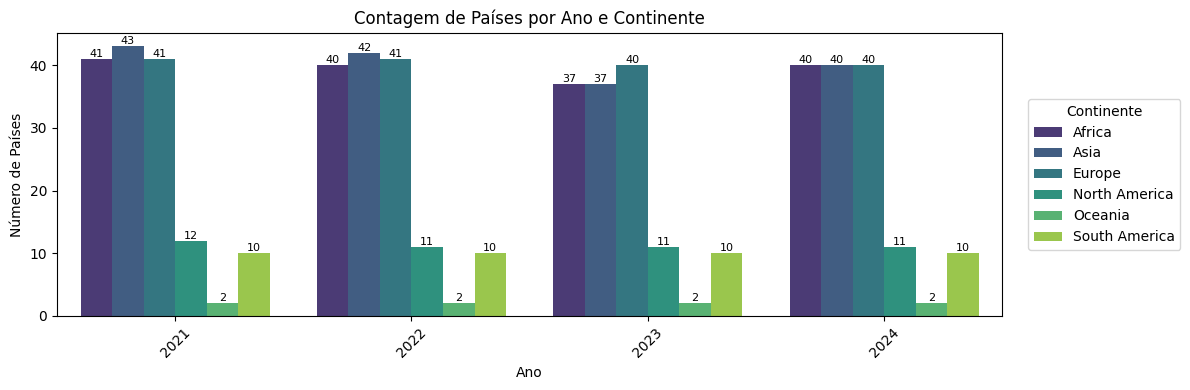

In [214]:
plot_data = df_whr.groupby(['Year', 'Continent']).nunique().reset_index()
plot_data.rename(columns={'Country name': 'Country Count'}, inplace=True)

plt.figure(figsize=(12, 4))
ax = sns.barplot(
    data=plot_data,
    x='Year',
    y='Country Count',
    hue='Continent',
    palette='viridis',
    errorbar=None
)

plt.title('Contagem de Países por Ano e Continente')
plt.xlabel('Ano')
plt.ylabel('Número de Países')
plt.xticks(rotation=45)
plt.legend(title='Continente', bbox_to_anchor=(1.02, 0.5), loc='center left')
for container in ax.containers:
    for patch in container.patches:
        height = patch.get_height()
        if height > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2, # Posição X (centro da barra)
                height,                                # Posição Y (topo da barra)
                f'{int(height)}',                      # Texto a ser exibido (o número inteiro)
                ha='center',                           # Alinhamento horizontal (centralizado)
                va='bottom',                           # Alinhamento vertical (abaixo do ponto)
                fontsize=8,                            # Tamanho da fonte
                color='black'                          # Cor do texto
            )
plt.tight_layout()
plt.show()

Observando a distribuição de continent, está dentro das proporções esperadas para o grupo. A Africa, Asia e Europa possuem mais países que os demais continentes.

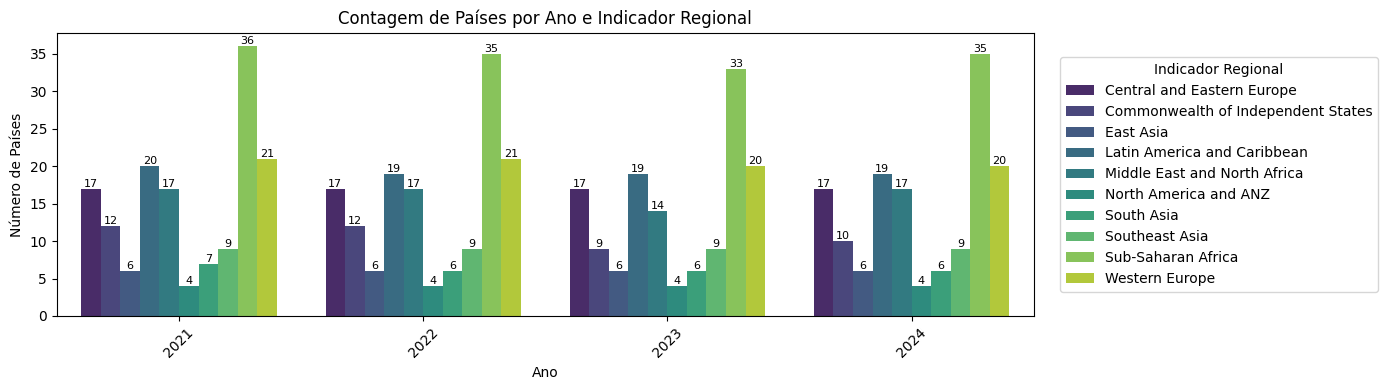

In [215]:
plot_data = df_whr.groupby(['Year', 'Regional indicator']).nunique().reset_index()
plot_data.rename(columns={'Country name': 'Country Count'}, inplace=True)

plt.figure(figsize=(14, 4))
ax = sns.barplot(
    data=plot_data,
    x='Year',
    y='Country Count',
    hue='Regional indicator',
    palette='viridis',
    errorbar=None
)

plt.title('Contagem de Países por Ano e Indicador Regional')
plt.xlabel('Ano')
plt.ylabel('Número de Países')
plt.xticks(rotation=45)
plt.legend(title='Indicador Regional', bbox_to_anchor=(1.02, 0.5), loc='center left')
for container in ax.containers:
    for patch in container.patches:
        height = patch.get_height()
        if height > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2, # Posição X (centro da barra)
                height,                                # Posição Y (topo da barra)
                f'{int(height)}',                      # Texto a ser exibido (o número inteiro)
                ha='center',                           # Alinhamento horizontal (centralizado)
                va='bottom',                           # Alinhamento vertical (abaixo do ponto)
                fontsize=8,                            # Tamanho da fonte
                color='black'                          # Cor do texto
            )
plt.tight_layout()
plt.show()

Observando a distribuição de reginal indicator, está dentro das proporções esperadas para o grupo e com uma segmentação e distribuição mais específica para os países.

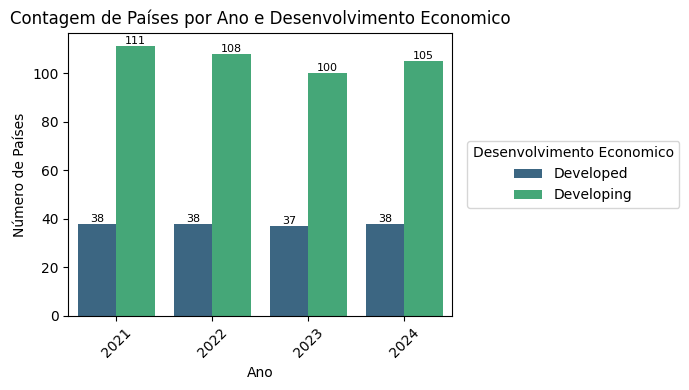

In [216]:
plot_data = df_whr.groupby(['Year', 'Economic Development']).nunique().reset_index()
plot_data.rename(columns={'Country name': 'Country Count'}, inplace=True)

plt.figure(figsize=(7, 4))
ax = sns.barplot(
    data=plot_data,
    x='Year',
    y='Country Count',
    hue='Economic Development',
    palette='viridis',
    errorbar=None
)

plt.title('Contagem de Países por Ano e Desenvolvimento Economico')
plt.xlabel('Ano')
plt.ylabel('Número de Países')
plt.xticks(rotation=45)
plt.legend(title='Desenvolvimento Economico', bbox_to_anchor=(1.02, 0.5), loc='center left')
for container in ax.containers:
    for patch in container.patches:
        height = patch.get_height()
        if height > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2, # Posição X (centro da barra)
                height,                                # Posição Y (topo da barra)
                f'{int(height)}',                      # Texto a ser exibido (o número inteiro)
                ha='center',                           # Alinhamento horizontal (centralizado)
                va='bottom',                           # Alinhamento vertical (abaixo do ponto)
                fontsize=8,                            # Tamanho da fonte
                color='black'                          # Cor do texto
            )
plt.tight_layout()
plt.show()

Observando a distribuição de economic development, está dentro das proporções esperadas para o grupo. A menor parte dos países do mundo são considerados desenvolvidos.

## Estatísticas Descritivas

Analisado um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis

### Informações gerais
Analise do paranorama geral do dataset.

In [217]:
df_whr.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Freedom to make life choices,Explained by: Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year,Regional indicator,Continent,Economic Development
0,Finland,7.842,7.904,7.780,0.691,0.741,1.446,1.106,0.124,0.481,3.253,2021,Western Europe,Europe,Developed
1,Denmark,7.620,7.687,7.552,0.686,0.763,1.502,1.108,0.208,0.485,2.868,2021,Western Europe,Europe,Developed
2,Switzerland,7.571,7.643,7.500,0.653,0.816,1.566,1.079,0.204,0.413,2.839,2021,Western Europe,Europe,Developed
3,Iceland,7.554,7.670,7.438,0.698,0.772,1.482,1.172,0.293,0.170,2.967,2021,Western Europe,Europe,Developed
4,Netherlands,7.464,7.518,7.410,0.647,0.753,1.501,1.079,0.302,0.384,2.798,2021,Western Europe,Europe,Developed


In [218]:
# estatísticas descritivas básicas do dataset
df_whr.describe()

,Ladder score,upperwhisker,lowerwhisker,Explained by: Freedom to make life choices,Explained by: Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year
count,575.000000,575.000000,575.000000,572.000000,571.000000,572.000000,572.000000,572.000000,572.000000,571.000000,575.000000
mean,5.538454,5.657216,5.419657,0.543164,0.500541,1.289007,0.992425,0.155358,0.147376,1.912394,2022.476522
std,1.114811,1.095223,1.135588,0.155701,0.196285,0.459035,0.336658,0.084361,0.123644,0.618446,1.125746
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000,2021.000000
25%,4.833000,4.978500,4.701500,0.451000,0.358500,0.965750,0.778250,0.093000,0.062000,1.558500,2021.000000
50%,5.661000,5.775000,5.520000,0.561500,0.535000,1.353000,1.022000,0.142000,0.115000,1.897000,2022.000000
75%,6.332500,6.452500,6.244000,0.654250,0.641000,1.665750,1.239500,0.207250,0.187000,2.311000,2023.000000
max,7.842000,7.904000,7.780000,0.863000,0.942000,2.209000,1.620000,0.541000,0.587000,3.482000,2024.000000


##Mediana, moda e média
Observa-se para o ladder score que a média é menor que a mediana e algumas modas. Além disso, a mediana cresce com os anos enquanto a média vem diminuindo.

In [219]:
median_ladder_score_by_year = df_whr.groupby('Year')['Ladder score'].median()
mode_ladder_score_by_year = df_whr.groupby('Year')['Ladder score'].apply(lambda x: x.mode().tolist())
mean_ladder_score_by_year = df_whr.groupby('Year')['Ladder score'].mean()

combined_stats = pd.DataFrame({
    'Mean': mean_ladder_score_by_year,
    'Median': median_ladder_score_by_year,
    'Mode': mode_ladder_score_by_year # A moda pode ser uma lista se houver múltiplos valores
})
print("Estatísticas Combinadas do Ladder score por Ano:")
print(combined_stats)

Estatísticas Combinadas do Ladder score por Ano:
          Mean  Median                                 Mode
Year                                                       
2021  5.532839  5.5340                       [5.477, 5.929]
2022  5.553575  5.5685  [4.516, 5.048, 5.122, 5.199, 5.377]
2023  5.539796  5.6840                [5.277, 6.125, 6.144]
2024  5.527580  5.7850                [3.502, 5.816, 6.188]


### Média

In [220]:
#méida do indicadores por ano
df_whr.groupby('Year').describe().xs('mean', level=1, axis=1)

,Ladder score,upperwhisker,lowerwhisker,Explained by: Freedom to make life choices,Explained by: Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Year,,,,,,,,,,
2021,5.532839,5.648007,5.417631,0.498711,0.520161,0.977161,0.793315,0.178047,0.135141,2.430329
2022,5.553575,5.673589,5.433568,0.517226,0.586171,1.410445,0.905863,0.147377,0.154781,1.831808
2023,5.539796,5.666526,5.412971,0.540000,0.366176,1.406985,1.156212,0.148474,0.145898,1.777838
2024,5.527580,5.641175,5.413972,0.620621,0.520886,1.378807,1.134329,0.146271,0.154121,1.575914


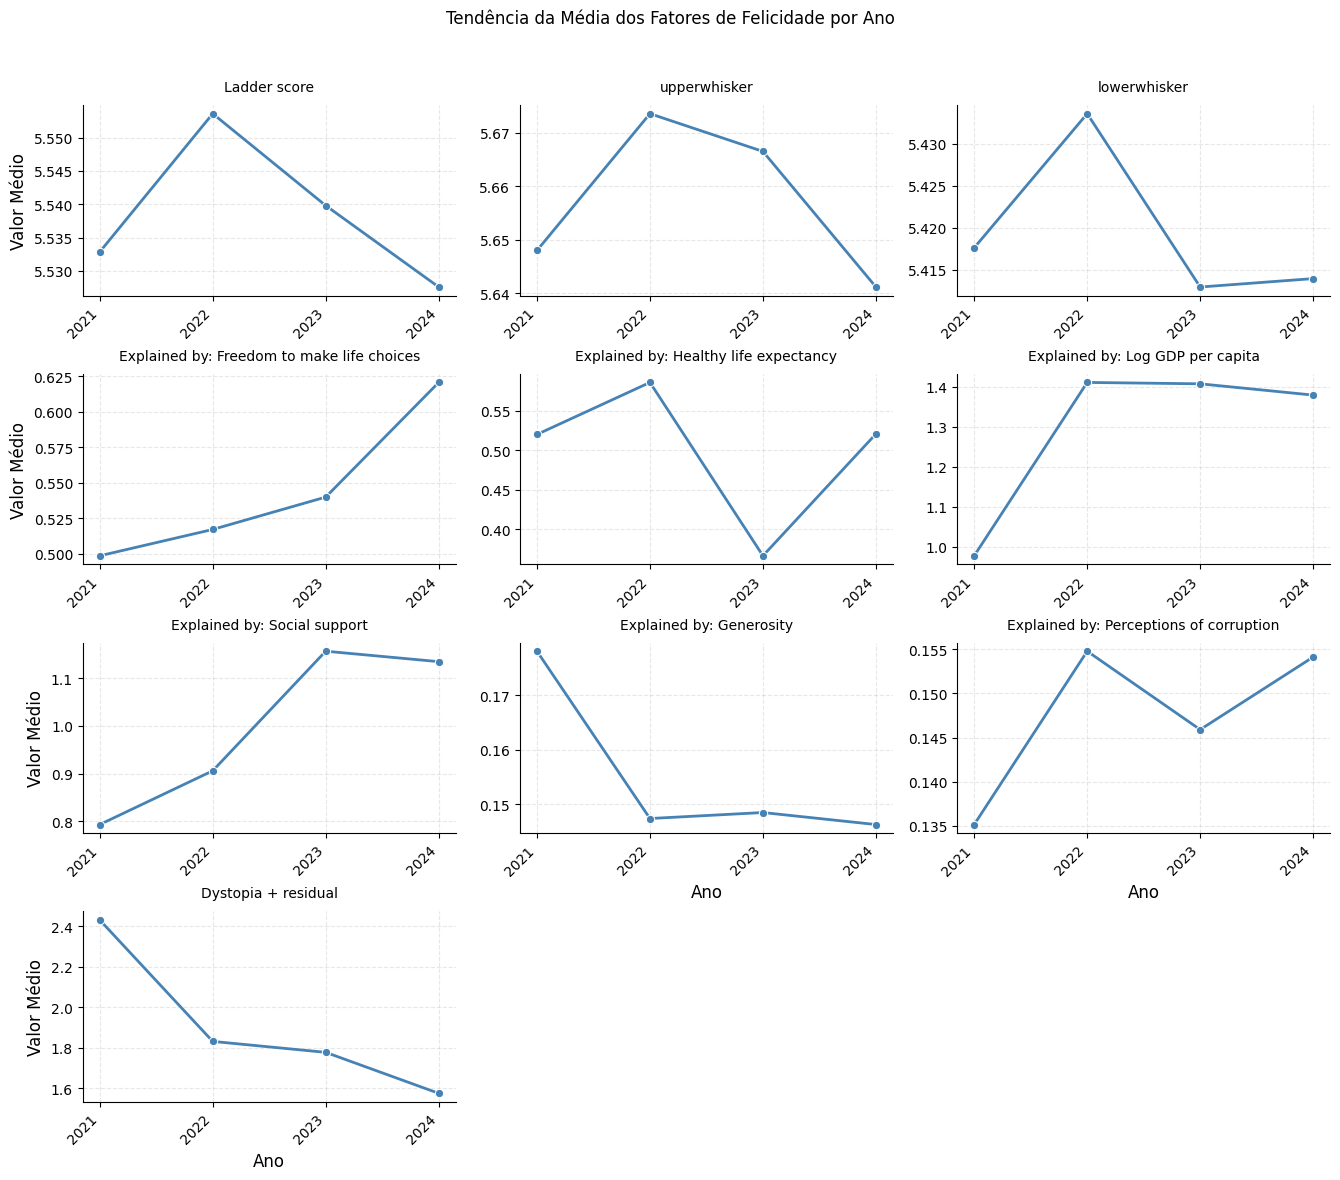

In [221]:
# Media das colunas por ano
cols_to_plot = [
    'Ladder score',
    'upperwhisker',
    'lowerwhisker',
    'Explained by: Freedom to make life choices',
    'Explained by: Healthy life expectancy',
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption',
    'Dystopia + residual'
]

plot_data_long = df_whr.groupby('Year')[cols_to_plot].mean().reset_index().melt(id_vars='Year', var_name='Factor', value_name='Mean Value')

g = sns.relplot(
    data=plot_data_long,
    x='Year',
    y='Mean Value',
    col='Factor',
    kind='line',
    marker='o',
    col_wrap=3,
    height=3,
    aspect=1.5,
    facet_kws={'sharey': False},
    color='steelblue',
    linewidth=2
)

# Configuração dos eixos x
years = sorted(plot_data_long['Year'].unique())
for i, ax in enumerate(g.axes.flat):
    ax.set_xticks(years)
    ax.set_xticklabels(
        [str(year) for year in years],
        rotation=45,
        ha='right',
        fontsize=10
    )
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
    ax.grid(True, linestyle='--', alpha=0.3)

g.set_axis_labels("Ano", "Valor Médio", fontsize=12)
g.set_titles("{col_name}", fontsize=13, pad=10)


plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Tendência da Média dos Fatores de Felicidade por Ano')

plt.show()

A média dos indicadores varia bastante com os anos. Além disso, é possível ver que a média do ladder score começou a cair a partir de 2022, junto com generosity, healthy life expectations e dystopial + residual.

### Desvio padrão


In [222]:
#puxando o desvio padrão por ano de cada indicador
df_whr.groupby('Year').describe().xs('std', level=1, axis=1)

,Ladder score,upperwhisker,lowerwhisker,Explained by: Freedom to make life choices,Explained by: Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Year,,,,,,,,,,
2021,1.073924,1.054330,1.094879,0.137888,0.213019,0.404740,0.258871,0.098270,0.114361,0.537645
2022,1.086843,1.065621,1.109380,0.145859,0.176336,0.421663,0.280122,0.082799,0.127514,0.534994
2023,1.139929,1.117421,1.163724,0.149501,0.156691,0.432963,0.326322,0.076053,0.126723,0.504390
2024,1.170717,1.155008,1.187133,0.162492,0.164923,0.425098,0.333317,0.073441,0.126238,0.537459


O desvio padrão se mantém com baixa oscilação nos indicadores ao longo dos anos. Agora, avaliando se o desvio padrão foi alto ou não, é possível ver um alto desvio padrão em Perceptions of corruption e Generosity

### Minimo

Avaliando o valor minimo por ano é possível notar que houve um aumento na desigualdade do ladder score. Com a piora do ladder score de alguns países em 2023 e 2024, a sua média foi puxada para baixo.

Além disso, a nota 0 em alguns indicadores fazem parte do ladder score dos países com nota mais baixa. Como o afeganistão que tem nota 0 para liberdade e para social support.


In [223]:
#apresentando o valor minimo por ano de cada indicador
df_whr.groupby('Year').describe().xs('min', level=1, axis=1)

,Ladder score,upperwhisker,lowerwhisker,Explained by: Freedom to make life choices,Explained by: Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Year,,,,,,,,,,
2021,2.523,2.596,2.449,0.0,0.0,0.0,0.0,0.0,0.0,0.648
2022,2.404,2.469,2.339,0.0,0.0,0.0,0.0,0.0,0.0,0.187
2023,1.859,1.923,1.795,0.0,0.0,0.0,0.0,0.0,0.0,-0.110
2024,1.721,1.775,1.667,0.0,0.0,0.0,0.0,0.0,0.0,-0.073


In [224]:
# Avaliando o valor 0 no mínimo das colunas
cols_to_filter = [
    'Explained by: Freedom to make life choices',
    'Explained by: Healthy life expectancy',
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption'
]

df_whr[(df_whr[cols_to_filter] == 0).any(axis=1)]

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Freedom to make life choices,Explained by: Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year,Regional indicator,Continent,Economic Development
59,Croatia,5.882,5.975,5.788,0.453,0.703,1.251,1.039,0.111,0.000,2.325,2021,Central and Eastern Europe,Europe,Developing
67,Greece,5.723,5.813,5.632,0.243,0.760,1.273,0.811,0.000,0.074,2.561,2021,Western Europe,Europe,Developing
127,Chad,4.355,4.540,4.171,0.240,0.000,0.255,0.353,0.215,0.084,3.209,2021,Sub-Saharan Africa,Africa,Developing
139,Burundi,3.775,3.985,3.565,0.298,0.155,0.000,0.062,0.172,0.212,2.876,2021,Sub-Saharan Africa,Africa,Developing
148,Afghanistan,2.523,2.596,2.449,0.000,0.126,0.370,0.000,0.122,0.010,1.895,2021,South Asia,Asia,Developing
195,Croatia,6.125,6.229,6.022,0.535,0.709,1.705,1.183,0.109,0.000,1.884,2022,Central and Eastern Europe,Europe,Developing
253,Georgia,4.973,5.079,4.867,0.508,0.595,1.467,0.612,0.000,0.208,1.583,2022,Commonwealth of Independent States,Asia,Developing
256,Venezuela,4.925,5.051,4.800,0.283,0.578,0.000,0.968,0.225,0.082,2.790,2022,Latin America and Caribbean,South America,Developing
289,Lesotho,3.512,3.748,3.276,0.419,0.000,0.839,0.848,0.076,0.018,1.312,2022,Sub-Saharan Africa,Africa,Developing
294,Afghanistan,2.404,2.469,2.339,0.000,0.289,0.758,0.000,0.089,0.005,1.263,2022,South Asia,Asia,Developing


## Histograma
Avaliar a distribuição dos dados do ladder score por ano para observar padrões e tendências

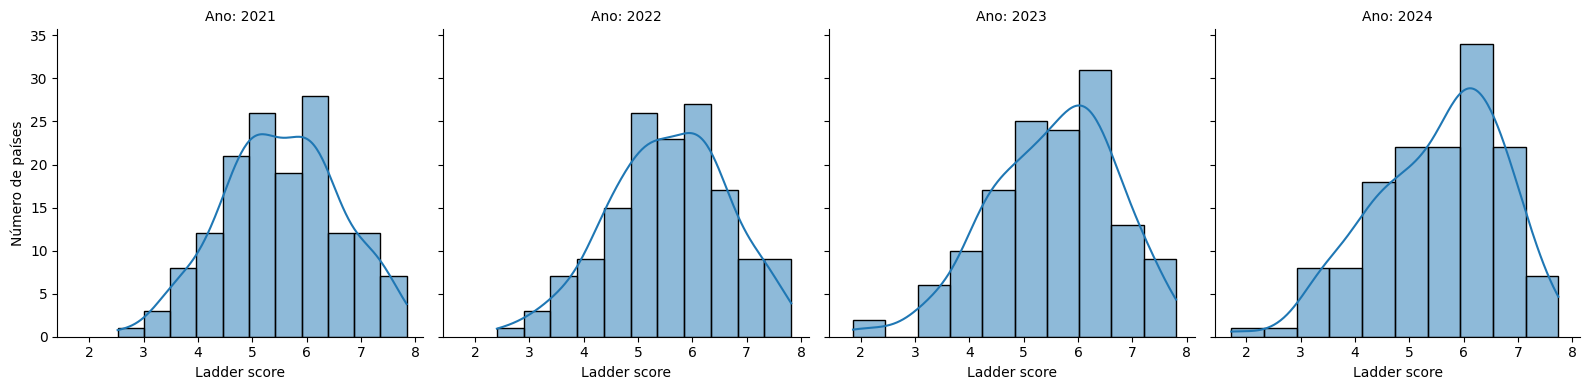

In [225]:
#histograma do ladder score por ano
g = sns.FacetGrid(df_whr, col='Year', col_wrap=4, height=4)
g.map(sns.histplot, 'Ladder score', kde=True)
g.set_axis_labels('Ladder score', 'Número de países')
g.set_titles('Ano: {col_name}')
plt.show()

O ladder score tem uma distribuição assimétrica à esquerda que vem se acentuando com o passar dos anos. Podemos observar que a maioria dos países tem melhorado a sua pontuação, entretanto outros países encontram-se com seu nível de felicidade em queda.

##Boxplot
Visualizar os indicadores por ano para podermos comparar a média, mediana e desvio padrão de cada um deles, além de observarmos outliers e o comportamento ao longo dos anos.

Também analisou-se essas características em 2024 para continente e desenvolvimento econômico.

###Análise do comportamento dos indicadores

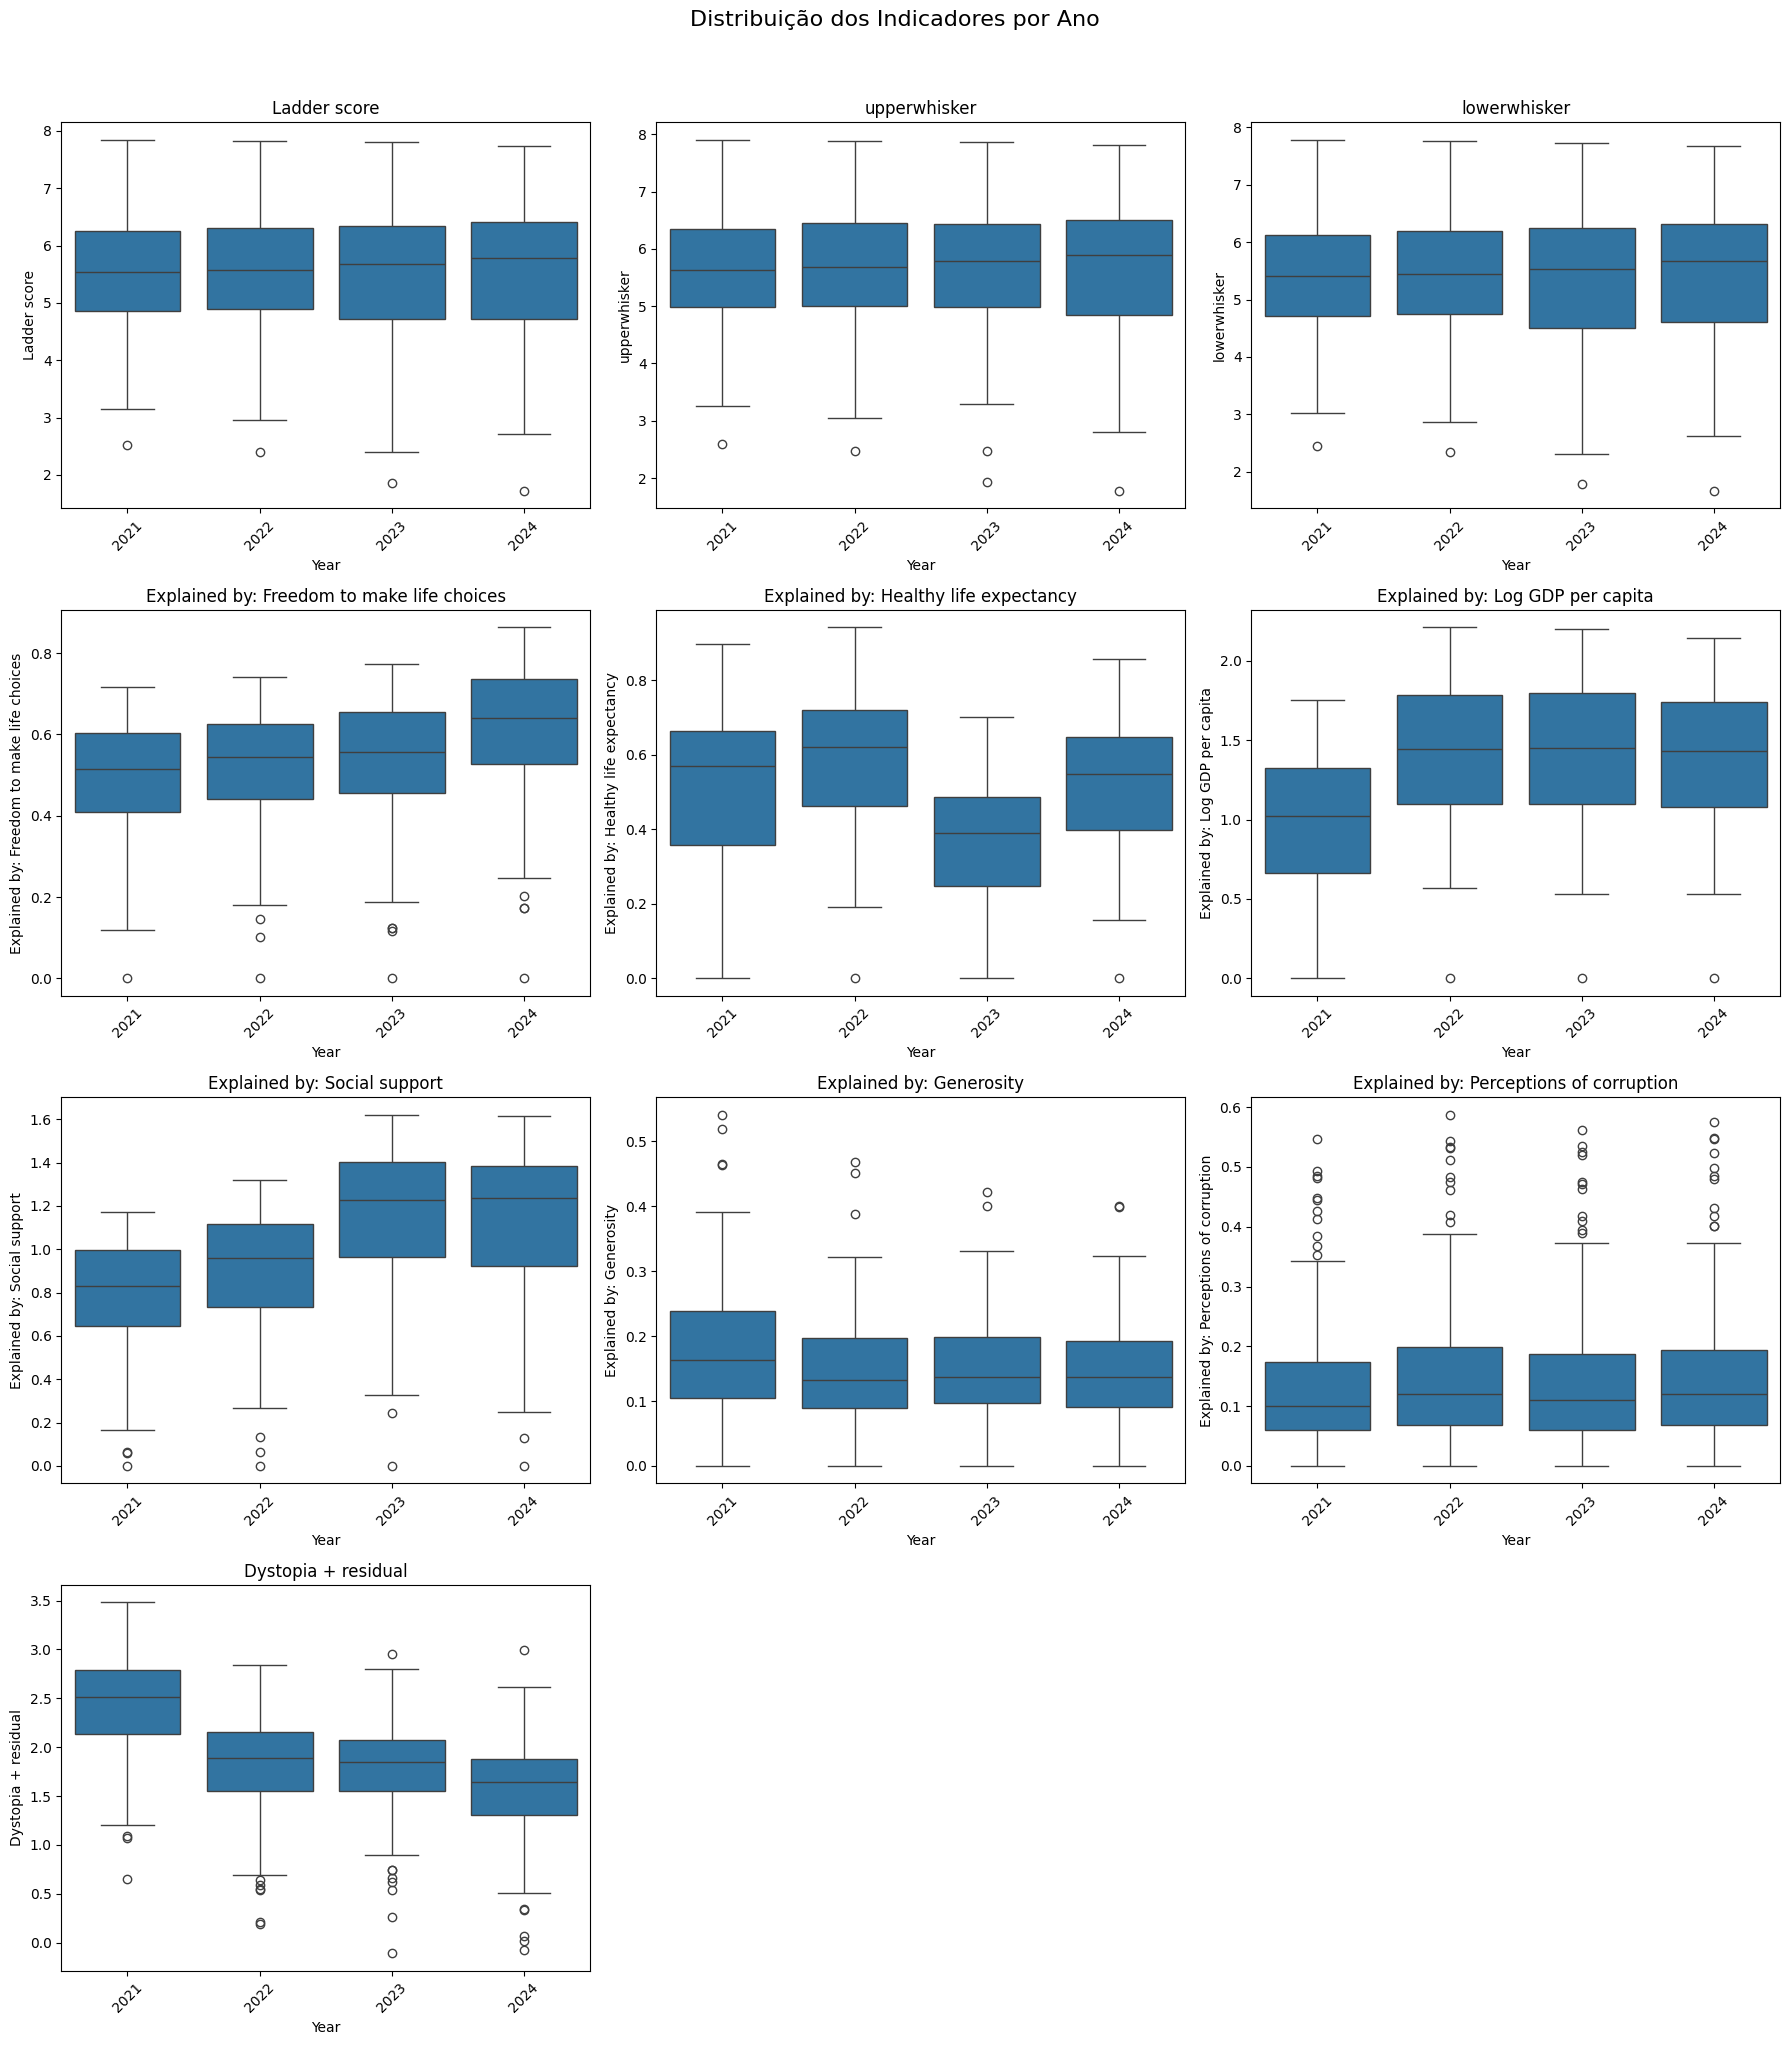

In [226]:
# Boxplot dos indicadores por ano
colunas = ['Ladder score', 'upperwhisker', 'lowerwhisker',
           'Explained by: Freedom to make life choices',
           'Explained by: Healthy life expectancy',
           'Explained by: Log GDP per capita',
           'Explained by: Social support',
           'Explained by: Generosity',
           'Explained by: Perceptions of corruption',
           'Dystopia + residual']

fig, axes = plt.subplots(4, 3, figsize=(18, 20))  # 4 linhas x 3 colunas
plt.suptitle('Distribuição dos Indicadores por Ano', fontsize=16, y=1.02)

for i, coluna in enumerate(colunas):
    sns.boxplot(
        x='Year',
        y=coluna,
        data=df_whr,
        ax=axes[i//3, i%3]
    )
    axes[i//3, i%3].set_title(coluna)
    axes[i//3, i%3].tick_params(axis='x', rotation=45)


for j in range(len(colunas), 12):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Para entender o comportamento, consistência e variabilidade dos indicadores, assim como um panorama geral para a análise da qualidade dos dados:
- perceptions of corruption tem uma quantidade maior de outliers
- social support vem melhorando ao longo dos anos nos países, entretanto as notas 25% mais baixas tem uma variação maior
- healthy life expectancy teve uma queda em 2023 que pode estar ligada a um efeito pós pandemia pandemia, que reduziu a expectativa de vida globalmente, especialmente em países com sistemas de saúde frágeis
- freedom vem crescendo como um ponto de felicidade nos últimos 4 anos
- ladder score  passou a ter mais países dentro dos 50% centrais ao longo dos anos, mostrando que os países estão espalhados por uma faixa mais ampla com alguns melhorando a pontuação e outros piorando

### Analise por continente e desenvolvimento economico em 2024


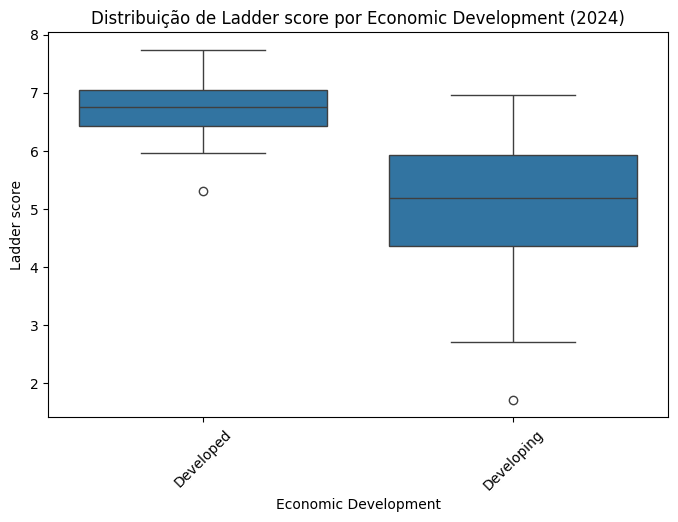

In [227]:
#Boxplot por desenvolvimento economico 2024
plt.figure(figsize=(8, 5))
sns.boxplot(x='Economic Development', y='Ladder score', data=df_whr[df_whr['Year'] == 2024])
plt.title('Distribuição de Ladder score por Economic Development (2024)')
plt.xlabel('Economic Development')
plt.ylabel('Ladder score')
plt.xticks(rotation=45)
plt.show()

Países desenvolvidos tem um ladder score mais alto que países em desenvolvimento.

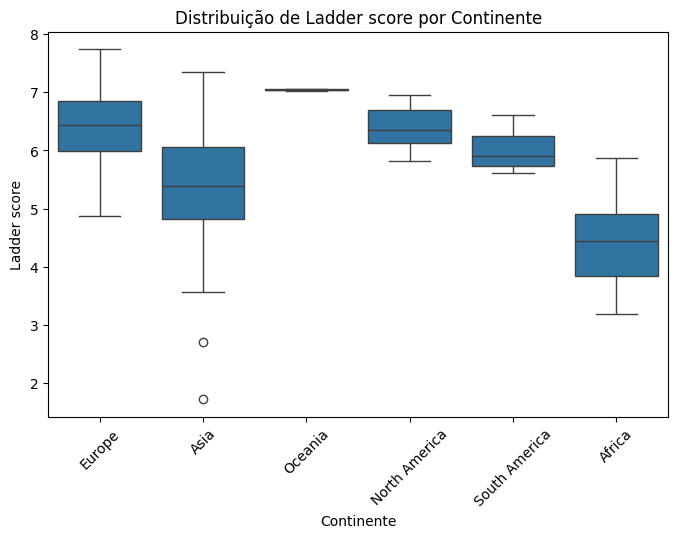

In [228]:
# boxplot por continente 2024
df_2024 = df_whr[df_whr['Year'] == 2024]

plt.figure(figsize=(8, 5))
sns.boxplot(x='Continent', y='Ladder score', data=df_whr[df_whr['Year'] == 2024])
plt.title('Distribuição de Ladder score por Continente')
plt.xlabel('Continente')
plt.ylabel('Ladder score')
plt.xticks(rotation=45)
plt.show()

Se aprofundarmos e analisarmos por continente, os países em desenvolvimento da america do sul tem um ladder score próximo de alguns países da europa e america do norte que são formados majoritariamente por países desenvolvidos.

In [229]:
df_whr_2024 = df_whr[df_whr['Year'] == 2024]

q1_by_continent = df_whr_2024.groupby('Continent')['Ladder score'].quantile(0.25)
median_by_continent = df_whr_2024.groupby('Continent')['Ladder score'].median()

continent_stats = pd.DataFrame({
    'Q1 (Ladder score)': q1_by_continent,
    'Mediana (Ladder score)': median_by_continent
})

continent_stats

,Q1 (Ladder score),Mediana (Ladder score)
Continent,,
Africa,3.84100,4.4460
Asia,4.82350,5.3855
Europe,5.99825,6.4450
North America,6.12600,6.3580
Oceania,7.03600,7.0430
South America,5.73975,5.9090


Podemos comparar melhor o Q1 da Europa com a mediana da América do Sul. A mediana da América do Sul quase se alinha com Q1 da Europa.

##Matriz correlação

Analisar a correção entre os indicadores númericos e avaliar qual tem mais correlação com o ladder score e qual tem menos



In [230]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, 1:11].corr()


Matriz de Correlação:


,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,0.999678,0.999697,0.768504,0.813542,0.759659,0.644451,0.130038,0.451829,0.533542
upperwhisker,0.999678,1.000000,0.998750,0.761804,0.811550,0.751042,0.646309,0.129602,0.448847,0.542267
lowerwhisker,0.999697,0.998750,1.000000,0.774531,0.814992,0.767506,0.642291,0.130446,0.454480,0.524816
Explained by: Log GDP per capita,0.768504,0.761804,0.774531,1.000000,0.726843,0.830256,0.414886,-0.059405,0.444227,-0.029118
Explained by: Social support,0.813542,0.811550,0.814992,0.726843,1.000000,0.706924,0.484641,0.079466,0.250870,0.159484
Explained by: Healthy life expectancy,0.759659,0.751042,0.767506,0.830256,0.706924,1.000000,0.401082,0.007148,0.399026,0.051538
Explained by: Freedom to make life choices,0.644451,0.646309,0.642291,0.414886,0.484641,0.401082,1.000000,0.224323,0.344197,0.250792
Explained by: Generosity,0.130038,0.129602,0.130446,-0.059405,0.079466,0.007148,0.224323,1.000000,0.172666,0.036423
Explained by: Perceptions of corruption,0.451829,0.448847,0.454480,0.444227,0.250870,0.399026,0.344197,0.172666,1.000000,0.000964
Dystopia + residual,0.533542,0.542267,0.524816,-0.029118,0.159484,0.051538,0.250792,0.036423,0.000964,1.000000


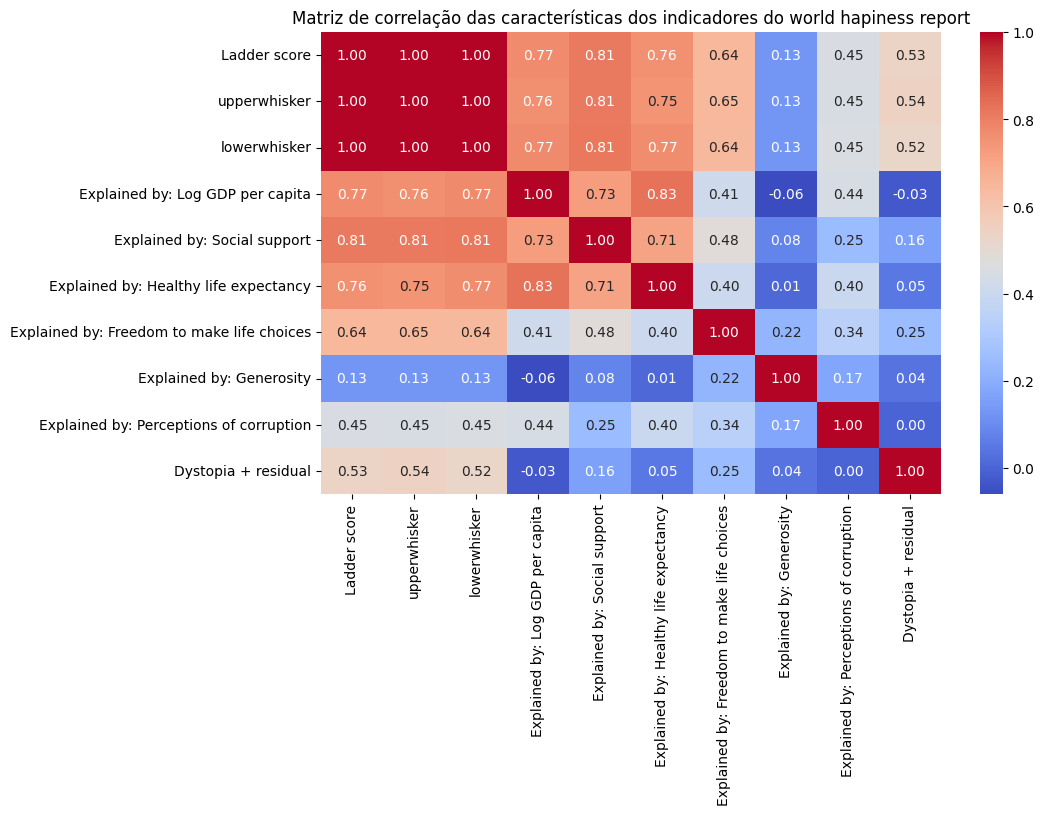

In [231]:
# mapa de calor das variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:, 1:11].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação das características dos indicadores do world hapiness report')
plt.show()

A análise mostra que o Ladder Score está mais fortemente correlacionado com:
- PIB per capita (Log GDP per capita),
- Suporte social,
- Expectativa de vida saudável,
- Liberdade.

Esses quatro fatores parecem ter maior impacto na percepção de felicidade. Já a percepção de corrupção e a generosidade apresentaram correlações mais fracas, indicando que, embora relevantes, não são os principais determinantes da felicidade em nível global. A percepção de corrupção tem uma correlação baixa podendo ter sido "neutralizada" por outros fatores e generosidade causa um efeito limitado na nota final de felicidade de um país.

##Tratamento de valores nulos

Como os valores nulos afetam o machine learning e não possuem um padrão para serem preenchidos a partir de uma medida estatística, optei por exclui-los

In [232]:
# analisando o restante dos null
df_whr[df_whr.isnull().any(axis=1)]

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Freedom to make life choices,Explained by: Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year,Regional indicator,Continent,Economic Development
393,State of Palestine,4.908,5.089,4.727,0.416,NaN,1.144,1.309,0.065,0.067,NaN,2023,Middle East and North Africa,Asia,Developing
493,Bahrain,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Middle East and North Africa,Asia,Developed
519,Tajikistan,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Commonwealth of Independent States,Asia,Developing
534,State of Palestine,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,Middle East and North Africa,Asia,Developing


In [233]:
# excluindo linhas dos valores nulos
df_whr = df_whr.dropna()
df_whr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 574
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                571 non-null    object 
 1   Ladder score                                571 non-null    float64
 2   upperwhisker                                571 non-null    float64
 3   lowerwhisker                                571 non-null    float64
 4   Explained by: Freedom to make life choices  571 non-null    float64
 5   Explained by: Healthy life expectancy       571 non-null    float64
 6   Explained by: Log GDP per capita            571 non-null    float64
 7   Explained by: Social support                571 non-null    float64
 8   Explained by: Generosity                    571 non-null    float64
 9   Explained by: Perceptions of corruption     571 non-null    float64
 10  Dystopia + residual

## Informações do Brasil
Só por curiosidade: o Brasil vem caindo de posição no ranking do ladder score com o passar dos anos. Isso se deve a leve queda na sua pontuação e a melhora da pontuação deo outros países

In [234]:
# Informações do ladder score do Brasil
df_whr_copy = df_whr.copy()
df_whr_copy['Country name'] = df_whr_copy['Country name'].str.strip()
df_whr_copy['Ladder Rank'] = df_whr_copy.groupby('Year')['Ladder score'].rank(ascending=False, method='min')
brasil_df = df_whr_copy[df_whr_copy['Country name'] == 'Brazil'].sort_values(by='Year')
brasil_df.reset_index(drop=True)

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Freedom to make life choices,Explained by: Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year,Regional indicator,Continent,Economic Development,Ladder Rank
0,Brazil,6.330,6.415,6.245,0.514,0.571,1.028,0.944,0.142,0.117,3.015,2021,Latin America and Caribbean,South America,Developing,35.0
1,Brazil,6.293,6.384,6.202,0.546,0.615,1.462,1.044,0.131,0.134,2.361,2022,Latin America and Caribbean,South America,Developing,38.0
2,Brazil,6.125,6.252,5.997,0.558,0.387,1.454,1.250,0.131,0.137,2.205,2023,Latin America and Caribbean,South America,Developing,48.0
3,Brazil,6.272,6.390,6.154,0.685,0.548,1.430,1.269,0.130,0.142,2.068,2024,Latin America and Caribbean,South America,Developing,44.0


# Pré-processamento de dados
Preparação dos dados para modelagem, garantindo que os dados estejam no formato correto e com qualidade para o treinamento do algoritmo.

In [235]:
# Definição das features (x) e target (y)

categorical_features = [
    'Country name',
    'Regional indicator',
    'Continent',
    'Economic Development'
]

numeric_features = ['Year']

target = 'Ladder score'

In [236]:
# Separação dos dados de treino e teste
df_train = df_whr[df_whr['Year'].isin([2021, 2022, 2023])]
df_test = df_whr[df_whr['Year'] == 2024]

# Separação dos conjuntos
X_train = df_train[categorical_features + numeric_features]
y_train = df_train[target]

X_test = df_test[categorical_features + numeric_features]
y_test = df_test[target]

##Codificação alternativa para categórica "Country name"
No World Happiness Report, a codificação alternativa é especialmente relevante para a coluna 'Country name', que tem alta cardinalidade (muitos países únicos).

Para tratar, calcula-se a média do Ladder Score nas amostras de treino e substitui o nome do país por essa média

In [237]:
# Aplica o Target Encoding apenas para 'Country name'
country_encoder = TargetEncoder(cols=['Country name'])
X_train['Country name'] = country_encoder.fit_transform(X_train['Country name'], y_train)
X_test['Country name'] = country_encoder.transform(X_test['Country name'])

# Atualiza as listas de features
numeric_features.append('Country name')
categorical_features.remove('Country name')

/tmp/ipython-input-237-2539786334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Country name'] = country_encoder.fit_transform(X_train['Country name'], y_train)
/tmp/ipython-input-237-2539786334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Country name'] = country_encoder.transform(X_test['Country name'])


##Normalização

Na normalização, as features numéricas serão padronizadas para valores em torno da faixa de 0 a 1 para que os dados não sejam distorcidos. Dessa forma, garante-se para o ML uma forma de comparação justa entre features e, assim, otimizamos o desempenho do modelo.

In [238]:
# Cria o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),  # Normaliza numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Normaliza categoricas
            ]
)

# Cria pipeline de pré-processamento: passa um conjunto de instruções para rodar o prepocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Aplica o pré-processamento no ambiente de treino e de teste
pipeline.fit(X_train)
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Para colunas categóricas (OneHotEncoder)
cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names = cat_encoder.get_feature_names_out(categorical_features)

# Concatenaçã de todos os nomes de features
all_feature_names = np.concatenate([numeric_features, categorical_feature_names])

# 8. Converter para DataFrame para visualização
df_train_processed = pd.DataFrame(X_train_processed.toarray(), columns=all_feature_names)
df_test_processed = pd.DataFrame(X_test_processed.toarray(), columns=all_feature_names)

In [239]:
df_train_processed.head()

,Year,Country name,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Economic Development_Developed,Economic Development_Developing
0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.962532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.931419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.950483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.928961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [240]:
df_test_processed.head()

,Year,Country name,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Economic Development_Developed,Economic Development_Developing
0,1.5,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.5,0.962532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.5,0.950483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.5,0.920568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.5,0.911696,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


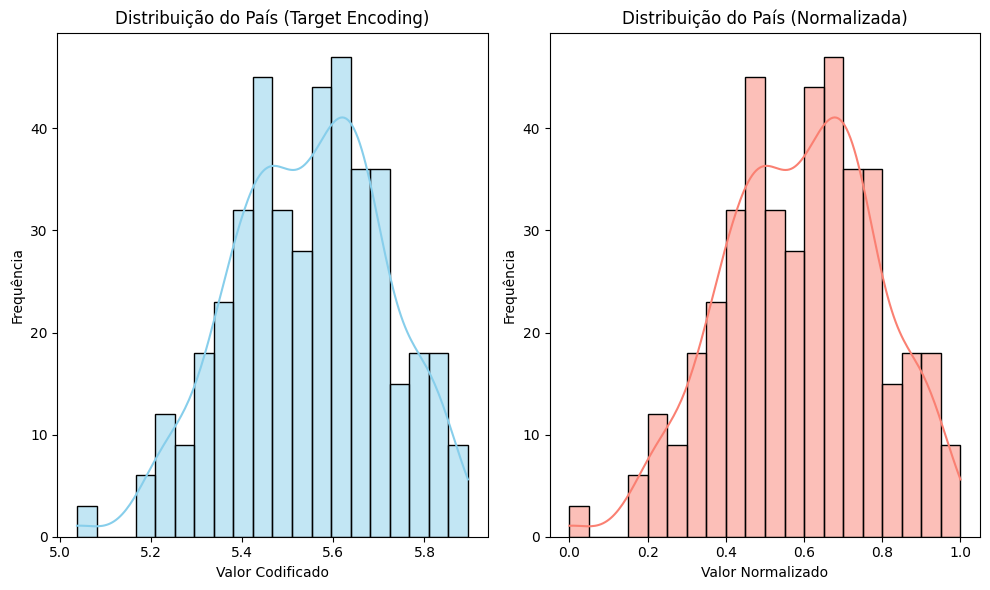

In [241]:
# visulização da coluna "Country name" antes e depois da normalização
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1) #Antes da normalização e depois do TargetEncoder
sns.histplot(X_train['Country name'], kde=True, bins=20, color='skyblue')
plt.title('Distribuição do País (Target Encoding)')
plt.xlabel('Valor Codificado')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2) # Após normalização
sns.histplot(df_train_processed['Country name'], kde=True, bins=20, color='salmon')
plt.title('Distribuição do País (Normalizada)')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

A distribuição do país normalizada tem características similares ao cálculo do TargetEncoder.

# Conclusão

As informações trabalhas do world hapiness report nesse projeto foram ideais para validarmos as hipoteses e aplicarmos o pré-processamento. Nele encontramos informações do que afeta a felicidade das pessoas no mundo e como é a felicidade em determinados agrupamentos.

Para isso, avaliamos um dataset equilibrado com pouquíssimos outliers que nos permitiu distinguir bem os países e poder avaliar as hipoteses através de medidas estatísticas (média, mediana, Q1, Q3 e outras) e visualizações gráficas (histograma, matriz de correlaçã, boxplot e outros):

**Hipótese 1:**
  Ao analisar a evolução do 'Ladder score' através dos anos, observamos tendências complexas que sugerem uma crescente polarização. A mediana do 'Ladder score' tem apresentado um crescimento consistente, indicando que a pontuação de felicidade dos países vem ccrescendo ao longo dos anos. Isso sugere um avanço geral na percepção de bem-estar para uma parcela considerável dos países.

  No entanto, essa melhora não é universal. A média do 'Ladder score' tem diminuído, e o histograma revela um crescimento na sua cauda à esquerda. Essa combinação de uma mediana crescente com uma média decrescente, e uma cauda esquerda mais pronunciada, é um forte indicativo de que a distribuição da felicidade está se tornando mais assimétrica e desigual.

**Hipótese 2:** Continentes com mais paises desenvolvidos tem o ladder score mais alto.
  O boxplot de 2024 sugere que continentes com uma maior proporção de países classificados como 'Desenvolvidos' tendem a apresentar 'Ladder scores' mais altos. Por exemplo, a Europa e a América do Norte, que concentram a maioria dos países desenvolvidos no dataset, exibem medianas e quartis superiores mais elevados.

  Apesar da clara distinção geral, é notável que a distribuição do 'Ladder score' para a América do Sul em 2024 apresenta uma sobreposição interessante com a Europa. Especificamente, a mediana da América do Sul ccega próximo de se alinhar com o primeiro quartil (Q1) da Europa.

**Hipótese 3:**
  A análise da matriz de correlação indica que os principais fatores associados ao Ladder Score (indicador de felicidade) são: PIB per capita, Suporte Social, Expectativa de Vida Saudável e Liberdade para fazer escolhas de vida. Esses indicadores apresentam forte correlação positiva, sugerindo que são determinantes centrais para o bem-estar da população.

  Por outro lado, Percepção de Corrupção e Generosidade demonstram correlação mais fraca com o Ladder Score. Isso indica que, embora relevantes, esses fatores têm um impacto direto menor na felicidade quando comparados aos pilares socioeconômicos e de liberdade individual. A influência da corrupção, por exemplo, pode ser indireta ou moderada por outros aspectos mais estruturais.

Após a conclusão da análise foi possível realizar o pré-processamento. A tranformação da coluna países em valores númericos, seguida da sua normalização foi essencial para ajudar o modelo a aprender de forma mais eficiente. Assim como escolher as colunas para o modelo, a ideia seria prever um ano futuro, então para tornar esse cenário mais realista usamos somente colunas categoricas para medir o ladder score de 2024 visto que não teriamos os dados dos indicadores utilizados no ladder score o que restringiu as colunas que seriam usadas pelo modelo. Além disso, linhas de países com valores faltantes tiveram que ser removidas pela dificuldade na previsão de um indicador utilizado no ladder score.

Dificuldades que o algoritmo de machine learning pode encontrar:
- **Países novos**: Não será possível prever para países não vistos no treino
- **Tendências temporais**: Ignora variações anuais (ex.: um país em crise pode ter queda)
- **Poucos anos de previsão**: O modelo possui três anos para memorizar o desempenho histórico de cada país
- **Países que não estão presentes todos os anos**: O modelo terá menos informações para treinar sobre aquele país, mas ele pode utilizar outras colunas categoricas para aprender melhor

